# Twitter Tweets Sentiment Analysis 

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the file
df = pd.read_csv('tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Find the shape
df.shape

(14640, 15)

In [5]:
# Have a quick look at the dataset

## Perform Exploratory Analysis

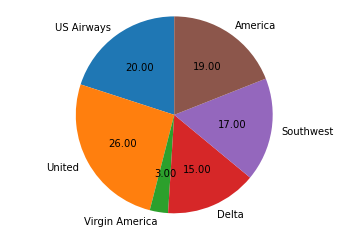

In [6]:
# Create a pie chart by airline %

# The slice names of a population distribution pie chart

pieLabels              = 'US Airways', 'United', 'Virgin America', 'Delta', 'Southwest', 'America'

 

# Population data

populationShare     = [20, 26, 3, 15, 17, 19]

 

figureObject, axesObject = plt.subplots()

 

# Draw the pie chart

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plt.show()

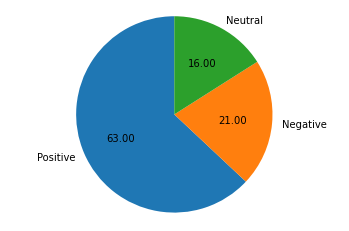

In [7]:
# Create a pie chart by airline sentiment
# Create a pie chart by airline %

# The slice names of a population distribution pie chart

pieLabels              = 'Positive', 'Negative', 'Neutral'

 

# Population data

populationShare     = [63, 21, 16]

 

figureObject, axesObject = plt.subplots()

 

# Draw the pie chart

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plt.show()


<AxesSubplot:xlabel='airline'>

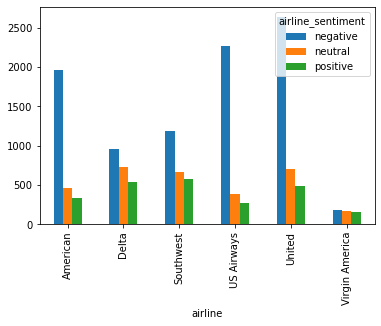

In [8]:
# Create a bar chart by airline and airline sentiment

airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')



<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

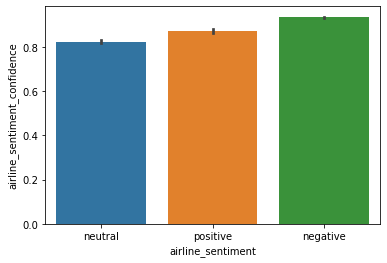

In [9]:
# Create a bar plot for airline sentiment and airline sentiment confidence

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data = df)


In [10]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe
columns = ['text','airline_sentiment']
df2 = df[columns]
df2 = df2[df2.airline_sentiment != 'neutral']




In [11]:
#Your final dataframe should look like this
df2.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [12]:
df2.tail()

,text,airline_sentiment
14633,@AmericanAir my flight was Cancelled Flightled...,negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14638,"@AmericanAir you have my money, you change my ...",negative


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:

from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

In [15]:
### Use this to create the corpus. Use the same steps from the last lab

# Steps for cleaning the first review and apply for loop on all the reviews
df['text'][0]
text = re.sub('[^a-zA-Z]', ' ', df['text'][0]) # only keep the letters so what we dont want to remove
text = text.lower() # make all letters as lowercase 
text = text.split()  # split the review into separate words to create a list of words
#ps =PorterStemmer()
text = [ word for word in text if not  word in set(stopwords.words('english'))] # use set for larger text
text = ' '.join(text) # take the list of words back into the string



In [21]:
text

'usairways grades trip flight timeliness cancelled flightations customer service flight attendants'

In [22]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 11541):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i] )
    text = text.lower()
    text = text.split()
    #ps =PorterStemmer()
    text = [ word for word in text if not  word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [23]:
corpus

['virginamerica dhepburn said',
 'virginamerica plus added commercials experience tacky',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seats playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hats parody https co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teens',
 'virginamerica lt pretty graphics much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive skies u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule st

In [24]:
### Create bag of words model
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 3000)# We restrict the words to 1500 which keeps the most frequent words


In [25]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [26]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
print(cv.get_feature_names())

['aa', 'aadvantage', 'abc', 'ability', 'able', 'aboard', 'abq', 'absolute', 'absolutely', 'absurd', 'abt', 'abysmal', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accidentally', 'accommodate', 'accommodations', 'according', 'account', 'accountability', 'accounts', 'acct', 'accurate', 'acknowledge', 'across', 'act', 'action', 'actions', 'active', 'activities', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'adds', 'admirals', 'admit', 'ads', 'advance', 'advantage', 'advertise', 'advertising', 'advice', 'advise', 'advisory', 'affected', 'afford', 'afternoon', 'age', 'agency', 'agent', 'agents', 'ages', 'ago', 'agree', 'ah', 'ahead', 'ahold', 'air', 'airbus', 'aircanada', 'aircraft', 'airfare', 'airline', 'airlines', 'airplane', 'airport', 'airports', 'airways', 'aisle', 'aka', 'albany', 'alert', 'alerts', 'ali', 'alive', 'alliance', 'allow', 'allowed', 'allowing', 'allows', 'almost', 'alone', 'along', 'already'

C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X.shape

(11541, 3000)

In [30]:
from sklearn.preprocessing import LabelEncoder
Enco= LabelEncoder()
df2["airline_sentiment"] = Enco.fit_transform(df2['airline_sentiment'])

In [31]:
df2

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1
...,...,...
14633,@AmericanAir my flight was Cancelled Flightled...,0
14634,@AmericanAir right on cue with the delays👌,0
14635,@AmericanAir thank you we got on a different f...,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,0


In [32]:
y = df2.iloc[:, 1].values

In [33]:
y

array([1, 0, 0, ..., 1, 0, 0])

### Apply Various Machine Learning Classification Models (all 5)

### Modeling
### Naive Bayes Model

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [41]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [42]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)


In [43]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2094  201]
 [ 512   79]]


In [44]:
# Evaluate the results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7529452529452529


In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import metrics

from sklearn.metrics import f1_score

prec_score = precision_score(y_test,y_pred)
recall_score= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [46]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.28214285714285714
Recall Score 0.13367174280879865
F1 Score 0.1814006888633754


### KNN Model

In [48]:
# Splitting the dataset into the Training set and Test set
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [52]:
y_pred = knn.predict(x_test)

In [53]:
# Make the Confusion Matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[1768  507]
 [ 445  166]]


In [54]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6701316701316701


In [55]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)



In [56]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.24665676077265974
Recall Score 0.13367174280879865
F1 Score 0.2585669781931464


### Decision Tree Classification Model

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [67]:
 from sklearn.tree import DecisionTreeClassifier

In [68]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [69]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [70]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[1845  430]
 [ 461  150]]


In [71]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6912681912681913


In [72]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [73]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.25862068965517243
Recall Score 0.13367174280879865
F1 Score 0.2518891687657431


### Random Forest Model

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

In [76]:
# Predicting the Test set results 
y_pred = rf.predict(x_test)

In [77]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[1899  376]
 [ 531   80]]


In [78]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6857241857241857


In [79]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [80]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.17543859649122806
Recall Score 0.13367174280879865
F1 Score 0.14995313964386128


### SVM

In [84]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [85]:
clf = SVC(kernel='linear').fit(x_train, y_train)

In [86]:
# Predicting the Test set results 
y_pred = clf.predict(x_test)

In [87]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2100  175]
 [ 543   68]]


In [88]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7512127512127512


In [89]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [90]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.27983539094650206
Recall Score 0.13367174280879865
F1 Score 0.15925058548009366


### Feature Extraction

### TF IDF

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [92]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [93]:
X1 =corpus

In [94]:
X1.shape

(11541, 1919)

In [95]:
y1 = df2.iloc[:, 1].values

### Modeling
### Naive Bayes Model

In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [97]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [98]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [99]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[1839    0]
 [ 467    3]]


In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.797747942832395


In [101]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [102]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 1.0
Recall Score 0.13367174280879865
F1 Score 0.012684989429175475


### KNN

In [139]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [140]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [141]:
# Predicting the Test set results 
y_pred = knn.predict(x_test)

In [142]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2028  247]
 [ 526   85]]


In [143]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7321552321552321


In [144]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [145]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.2560240963855422
Recall Score 0.13367174280879865
F1 Score 0.18027571580063625


### Support Vector Machine SVM Model

In [111]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [112]:
clf = SVC(kernel='linear').fit(x_train, y_train)

In [113]:
# Predicting the Test set results 
y_pred = clf.predict(x_test)

In [114]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2275    0]
 [ 610    1]]


In [115]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7886347886347886


In [116]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [117]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 1.0
Recall Score 0.13367174280879865
F1 Score 0.0032679738562091504


### Decision Tree Classification Model

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [119]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

In [120]:
# Predicting the Test set results 
y_pred = decision_tree.predict(x_test)

In [121]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[1894  381]
 [ 481  130]]


In [122]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7013167013167013


In [123]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [124]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.25440313111545987
Recall Score 0.13367174280879865
F1 Score 0.23172905525846704


### Random Forest Model

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [132]:
# Predicting the Test set results 
rf = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [135]:
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2226   49]
 [ 586   25]]


In [136]:
# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.77997227997228


In [137]:
prec_score = precision_score(y_test,y_pred)
rec= metrics.recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [138]:
print('Precision Score', prec_score)
print('Recall Score', recall_score)
print('F1 Score', f1)

Precision Score 0.33783783783783783
Recall Score 0.13367174280879865
F1 Score 0.07299270072992702


 

### Compare the various models on both the approaches.
### Which model predicts the best?

|Name of the model| Before Extraction | TF IDF
| :-  | :-  | :- |
|Naive Bayes Model| 0.752 | 0.797 |
|KNN Model| 0.67 | 0.732 |
|Support Vector Machine SVM Model| 0.751 | 0.788 |
|Decision Tree Model| 0.691 | 0.701 |
|Random Forest Model| 0.685 | 0.779 |

A-1. From the above accuracies table of the model perform on bag of words and using feature extraction TF-IDF,  in which model which have highest accuracy in regards to bag of words is the Naive Bayes Model predict 75.2 % accuracy. With using the TF-IDF the Naive bias  (79.7%), SVM (78.8%) and other accuracies are lesser than this two model. So overall the Naive Bayes predicts best in both techniques.

#### Dataset Source:


https://www.kaggle.com/code/yaowenling/amazon-cell-phone-review-nlp
    https://www.kaggle.com/code/lele1995/amazon-reviews-sentiment-analysis